
<br/><br/><br/>
## 2. Linear regression with multiple variables


In this part, you will implement linear regression with multiple variables to
predict the prices of houses. You want to predict the price of a house given its size and number of bedrooms. To achieve this, you need to train a model on data collected on housing prices given its size and number of bedrooms.

The file ex1data2.txt contains a training set of housing prices in Portland, Oregon. The first column is the size of the house (in square feet), the
second column is the number of bedrooms, and the third column is the price
of the house.




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load Data
data = pd.read_csv('data/ex1data2.txt', names=['size','bedroom','price']);
X = data.iloc[:, :2].values;
y = data.iloc[:, 2].values;
m = len(y);

data.head()

,size,bedroom,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [3]:
data.shape

(47, 3)

In [4]:
def h_of_x(X, theta):
    return np.dot(X,theta)

In [5]:
def computeCostMulti(X, y, theta):
    m = len(y)
    J = (np.sum((np.dot(X,theta) - y)**2))/(2*m)
    return J

### 2.1 Feature Normalization


In [6]:
# Mean Normalization
def	featureNormalize(X):

    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    #======================

    mu = np.mean(X,axis=0)
    sigma = np.std(X,axis=0)
    X_norm = np.divide((X - mu),sigma)

    #====================
    return X_norm, mu, sigma



In [7]:
# Scale features and set them to zero mean
print ('Normalizing Features ...')
X, mu, sigma = featureNormalize(X)
print ('[mu] [sigma]')
print (mu, sigma)

# Add intercept term to X
X = np.concatenate((np.ones((m, 1)), X), axis=1)

Normalizing Features ...
[mu] [sigma]
[2000.68085106    3.17021277] [7.86202619e+02 7.52842809e-01]


### 2.2 Gradient Descent


**Implementation Note:** In the multivariate case, the cost function can
also be written in the following vectorized form:
$$J(\theta) = \frac{1}{2m}(X\theta-\vec{y})^T (X\theta-\vec{y})$$

$$X = 
\begin{bmatrix}
....(x^{(1)})^T....\\
....(x^{(2)})^T....\\
.  \\
.  \\
. \\
....(x^{(m)})^T....
\end{bmatrix}, \ \ \ \ \ \ \ \ \  
\vec{y} = 
\begin{bmatrix}
y^{(1)}\\
y^{(2)}\\
.\\
. \\
.\\
y^{(m)}
\end{bmatrix}$$



In [8]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    m = len(y); # number of training examples
    J_history = np.zeros([num_iters, 1]);

    for iter in range(num_iters):
        #============ Your code here =============
        #theta = theta - (alpha/m)*np.sum((h_of_x(X,theta)-y)[:,None]*X,axis=0)
        
        theta = theta - (alpha/m)*(np.dot(X.T,(h_of_x(X,theta)-y)))
        
        #==================================
        J_history[iter] = computeCostMulti(X, y, theta)
        



    return theta, J_history


In [9]:
# Choose some alpha value
alpha = 0.01
num_iters = 400

def gd(alpha):
    print ('Running gradient descent ...')
    # Init Theta and Run Gradient Descent 
    thet = np.zeros(3)
    thet, J_history = gradientDescentMulti(X, y, thet, alpha, num_iters)
    
    return thet, J_history

thet, J_history = gd(alpha)

Running gradient descent ...


### 2.3 Selecting learning rates
In this part of the exercise, you will get to try out different learning rates for
the dataset and find a learning rate that converges quickly. We rec-
ommend trying values of the learning rate $\alpha$ on a log-scale, at multiplicative
steps of about 3 times the previous value (i.e., 0.3, 0.1, 0.03, 0.01 and so on).
You may also want to adjust the number of iterations you are running if that
will help you see the overall trend in the curve.

Running gradient descent ...
Running gradient descent ...
Running gradient descent ...
Running gradient descent ...
Running gradient descent ...


/Users/sens3i/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in square
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/sens3i/anaconda3/envs/tf/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


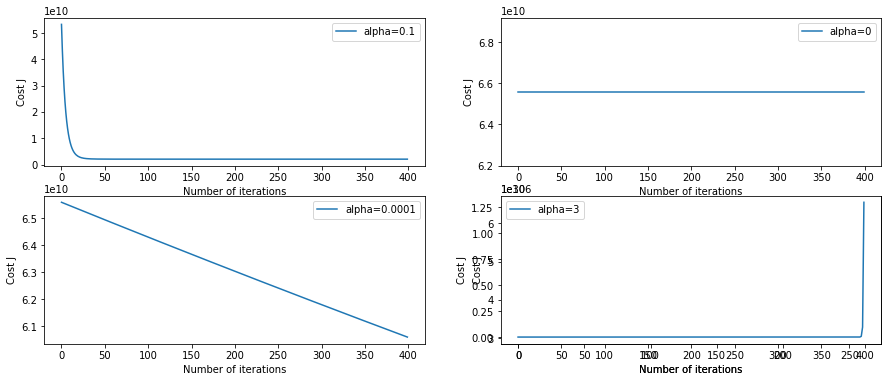

In [10]:
# Choose some alpha value
alphas = [0.001,0.1,0,.0001,3]
thetas = []
num_iters = 400

def costs():
    J = []
    for i in alphas:
        alpha = i
        thet, j = gd(i)
        J.append(j)
        thetas.append(thet)
    return J

J_hists = costs()

axs = []
fig = plt.figure(figsize=(15,6))
for i in range(len(J_hists)):
    axs.append(fig.add_subplot('22'+str(i)))
    axs[-1].plot(J_hists[i], label="alpha="+str(alphas[i]))
    axs[-1].set_xlabel('Number of iterations')
    axs[-1].set_ylabel('Cost J')
    #axs[-1].title = str(alphas[i])
    plt.show

    plt.legend()


In [11]:
thet

array([334302.06399328,  99411.44947359,   3267.01285407])

Now make a prediction for a house with 1650 square feet and
3 bedrooms

In [12]:
print ('Theta computed from gradient descent: ')
print (thet)

price = None
# Estimate the price of a 1650 sq-ft, 3 br house
####### START CODE ###########

example = np.array([[1, 1650, 3]])   # the test example
example_norm = np.ones(example.shape)  # a variable is initialized with an array of ones of same shape as the test example
                                        # this variable will hold the normalized features
    
    
example_norm.dtype = np.float # Note that the array datatype must be float32 and not int
    
    
# apply feature scaling and normalization
example_norm[:, 1:] = np.divide((example[:, 1:] - mu),sigma)


# Now make predictions
price = h_of_x(example_norm, thet)

####### END CODE ############

print ('Predicted price of a 1650 sq-ft, 3 br house')
print ('using gradient descent: ')
print (price)

Theta computed from gradient descent: 
[334302.06399328  99411.44947359   3267.01285407]
Predicted price of a 1650 sq-ft, 3 br house
using gradient descent: 
[289221.54737122]


In [13]:
thetas[3]

array([13348.4254743 ,  4123.80633168,  2099.41753612])

In [14]:
example_norm[:, 1:]

array([[-0.44604386, -0.22609337]])

### 3.3 Normal Equations

$$\theta = (X^TX)^{-1}X^T\vec{y}$$

Using this formula does not require any feature scaling, and you will get
an exact solution in one calculation: there is no \loop until convergence" like
in gradient descent.

Complete the code in normaleqn.py to use the formula above to calcu-
late $\theta$. Remember that while you don't need to scale your features, we still
need to add a column of 1's to the X matrix to have an intercept term

In [15]:
def normalEqn(X,y):

    
    return np.dot((np.linalg.inv(np.dot(X.T,X))),np.dot(X.T,y))

In [16]:
print ('Solving with normal equations...')

# Calculate the parameters from the normal equation

theta = normalEqn(X, y)

# Display normal equation's result
print ('Theta computed from the normal equations:')
print (' %s \n' % theta)

Solving with normal equations...
Theta computed from the normal equations:
 [340412.65957447 109447.79646964  -6578.35485416] 



Now, since you have found $\theta$ using normal equation
method, use it to make a price prediction for a 1650-square-foot house with
3 bedrooms. You should find that gives the same predicted price as the value
you obtained using the model fit with gradient descent.

In [17]:
price = None
# Estimate the price of a 1650 sq-ft, 3 br house
####### START CODE ###########

price = h_of_x(example_norm, theta)

####### END CODE ############

print ('Predicted price of a 1650 sq-ft, 3 br house')
print ('using gradient descent: ')
print (price)

Predicted price of a 1650 sq-ft, 3 br house
using gradient descent: 
[293081.4643349]
